## DATA UNDERSTANDING FOR SUPERCELL DATASET

Basic libraries for preprocessing and some special ones like NLTK, regex for text preprocessing .

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import pickle
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer
import association_metrics as am
from collections import Counter

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


There are 2 different chats datasets, the features of both the datasets are the same.

In [2]:
chat2_df = pd.read_parquet('final_df_chat2.parquet')
chat2_df.head(10)

,revenue,account_state,level,created_language,created_country_code,session_count_today,session_duration_today,transaction_count_today,revenue_today,raw_message,...,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,family_friendly,date
0,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,can we play 1v1 battle,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01
1,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,anyone come. 1v1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01
2,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,battle,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01
3,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,anyone want it 1v1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01
4,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,yea,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01
5,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,i am just of 12,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01
6,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,and 1 for 1y ears,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01
7,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,so i will be less online due to this,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01
8,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,Monkey is having tea,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01
9,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,net prob,...,-1,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01


In [3]:
# one of the most important steps is to check for datatypes of the features in the dataset. This helps to understand how the 
# data might be and what changes are needed to make it in a way it should be.
chat2_df.dtypes

revenue                         float64
account_state                     int64
level                           float64
created_language               category
created_country_code           category
session_count_today               int64
session_duration_today          float64
transaction_count_today           int64
revenue_today                   float64
raw_message                      object
filtered_message                 object
filtered                          int64
filtered_content                 object
GENERAL_RISK                      int64
BULLYING                          int64
VIOLENCE                          int64
RELATIONSHIP_SEXUAL_CONTENT       int64
VULGARITY                         int64
DRUGS_ALCOHOL                     int64
IN_APP                            int64
ALARM                             int64
FRAUD                             int64
HATE_SPEECH                       int64
RELIGIOUS                         int64
WEBSITE                           int64


In [4]:
# converting categorical variables into data type as category
to_categorical_vars = ['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly']

for i in range(len(to_categorical_vars)):
    chat2_df[to_categorical_vars[i]] = chat2_df[to_categorical_vars[i]].astype('category')
    
chat2_df.dtypes

revenue                         float64
account_state                     int64
level                           float64
created_language               category
created_country_code           category
session_count_today               int64
session_duration_today          float64
transaction_count_today        category
revenue_today                   float64
raw_message                      object
filtered_message                 object
filtered                       category
filtered_content                 object
GENERAL_RISK                   category
BULLYING                       category
VIOLENCE                       category
RELATIONSHIP_SEXUAL_CONTENT    category
VULGARITY                      category
DRUGS_ALCOHOL                  category
IN_APP                         category
ALARM                          category
FRAUD                          category
HATE_SPEECH                    category
RELIGIOUS                      category
WEBSITE                        category


In [5]:
chat2_df.drop(['date'],1,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
# a seperate categorical features dataframe for correlation analysis.
cat_chat2_df = chat2_df[['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly']]
cat_chat2_df.head(10)

,filtered,GENERAL_RISK,BULLYING,VIOLENCE,RELATIONSHIP_SEXUAL_CONTENT,VULGARITY,DRUGS_ALCOHOL,IN_APP,ALARM,FRAUD,...,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,created_language,created_country_code,transaction_count_today,family_friendly
0,0,2,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
1,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
2,0,1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
3,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
4,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
5,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,-1
6,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,-1
7,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,-1
8,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-IN,IN,0,-1
9,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0


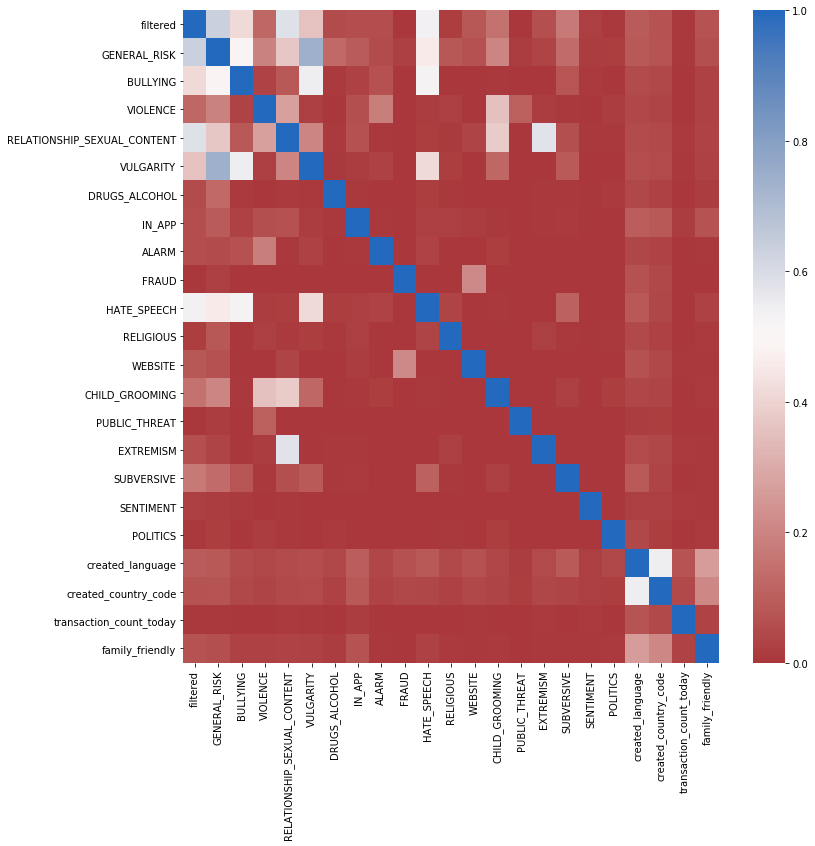

In [7]:
# the dependent variable chosen is filtered column. The reason is that this column depends upon the values of other features 
# such as the ones given in the heatmap below
cramers_char2 = am.CramersV(cat_chat2_df)
plt.figure(figsize=(12,12))
ax = sns.heatmap(cramers_char2.fit(), cmap = 'vlag_r')
plt.show()

In [8]:
# Just like categorical dataframe, a continous dataframe helps determine the relationship between these features and
# filtered feature.

cont_chat2_df = chat2_df.drop(['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly'],1)
cont_chat2_df.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


,revenue,account_state,level,session_count_today,session_duration_today,revenue_today,raw_message,filtered_message,filtered_content
0,0.0,3,33.0,2,5275.434000,0.0,can we play 1v1 battle,can we play 1v1 battle,[]
1,0.0,3,33.0,2,5275.434000,0.0,anyone come. 1v1,anyone come. 1v1,[]
2,0.0,3,33.0,2,5275.434000,0.0,battle,battle,[]
3,0.0,3,33.0,2,5275.434000,0.0,anyone want it 1v1,anyone want it 1v1,[]
4,0.0,3,33.0,2,5275.434000,0.0,yea,yea,[]
5,0.0,3,31.0,3,1691.798000,0.0,i am just of 12,i am just of 12,[]
6,0.0,3,31.0,3,1691.798000,0.0,and 1 for 1y ears,and 1 for 1y ears,[]
7,0.0,3,31.0,3,1691.798000,0.0,so i will be less online due to this,so i will be less online due to this,[]
8,0.0,3,50.0,7,3975.559000,0.0,Monkey is having tea,Monkey is having tea,[]
9,0.0,3,32.0,14,4192.960001,0.0,net prob,net prob,[]


In [9]:
cont_chat2_df['filtered_content'].value_counts().index

Index(['[]', '['nigga']', '['gay']', '['Nigger']', '['nigger']', '['pussy']',
       '['wtf']', '['Nigga']', '['sex']', '['dick']',
       ...
       '['Zi']', '['CongrTs']', '['is' 'fucked' 'you']', '['Lil' 'pecker']',
       '['Swick=free']', '['culion']', '['ate']', '['hard' 'ass,']',
       '['to' 'use' 'ARCGIS']', '['I' 'LOOOOOOOVVVVEEEEEEE' 'cock']'],
      dtype='object', length=2832)

In [10]:
cont_chat2_df.drop(['raw_message','filtered_message','filtered_content'],1,inplace=True)
cont_chat2_df['filtered'] = chat2_df['filtered']
cont_chat2_df.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,revenue,account_state,level,session_count_today,session_duration_today,revenue_today,filtered
0,0.0,3,33.0,2,5275.434000,0.0,0
1,0.0,3,33.0,2,5275.434000,0.0,0
2,0.0,3,33.0,2,5275.434000,0.0,0
3,0.0,3,33.0,2,5275.434000,0.0,0
4,0.0,3,33.0,2,5275.434000,0.0,0
5,0.0,3,31.0,3,1691.798000,0.0,0
6,0.0,3,31.0,3,1691.798000,0.0,0
7,0.0,3,31.0,3,1691.798000,0.0,0
8,0.0,3,50.0,7,3975.559000,0.0,0
9,0.0,3,32.0,14,4192.960001,0.0,0


The barplots below will throw a light on the impact of the continous variables on filtered column

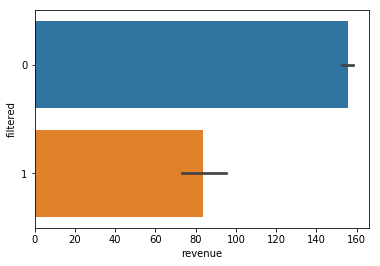

In [11]:
sns.barplot(x = cont_chat2_df['revenue'], y = cont_chat2_df['filtered'])

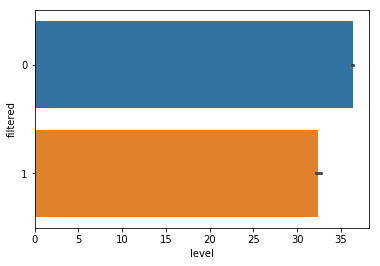

In [12]:
sns.barplot(x = cont_chat2_df['level'], y = cont_chat2_df['filtered'])

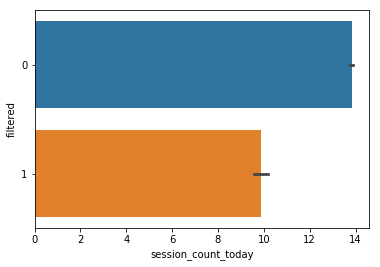

In [13]:
sns.barplot(x = cont_chat2_df['session_count_today'], y = cont_chat2_df['filtered'])

In [14]:
chat1_df = pd.read_parquet('final_df_chat1.parquet')
chat1_df.head(10)

,revenue,account_state,level,created_language,created_country_code,session_count_today,session_duration_today,transaction_count_today,revenue_today,raw_message,...,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,family_friendly,date,raw_message_preprocessed
0,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,come friendly battle,...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,come friendly battle
1,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,Lord let's do 2v2,...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,lord let u 2v2
2,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,and I am legend,...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,legend
4,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,I am playing this game for 5 years,...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,playing game 5 year
5,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,I have played my battles,...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,played battle
7,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,tu abhi bacha h,...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,tu abhi bacha h
8,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,sorry,...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,sorry
9,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,now let's play,...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,let u play
10,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,but still,...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,still
11,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,ok,...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,ok


In [15]:
to_categorical_vars = ['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly']

for i in range(len(to_categorical_vars)):
    chat1_df[to_categorical_vars[i]] = chat1_df[to_categorical_vars[i]].astype('category')
    
chat1_df.dtypes

revenue                         float64
account_state                     int64
level                           float64
created_language               category
created_country_code           category
session_count_today               int64
session_duration_today          float64
transaction_count_today        category
revenue_today                   float64
raw_message                      object
filtered_message                 object
filtered                       category
filtered_content                 object
GENERAL_RISK                   category
BULLYING                       category
VIOLENCE                       category
RELATIONSHIP_SEXUAL_CONTENT    category
VULGARITY                      category
DRUGS_ALCOHOL                  category
IN_APP                         category
ALARM                          category
FRAUD                          category
HATE_SPEECH                    category
RELIGIOUS                      category
WEBSITE                        category


In [16]:
cat_chat1_df = chat1_df[['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly']]
cat_chat1_df.head(10)

,filtered,GENERAL_RISK,BULLYING,VIOLENCE,RELATIONSHIP_SEXUAL_CONTENT,VULGARITY,DRUGS_ALCOHOL,IN_APP,ALARM,FRAUD,...,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,created_language,created_country_code,transaction_count_today,family_friendly
0,0,2,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
1,0,2,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,-1
2,0,1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,-1
4,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-IN,IN,0,-1
5,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-IN,IN,0,-1
7,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-IN,IN,0,-1
8,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
9,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
10,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0
11,0,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,en-GB,IN,0,0


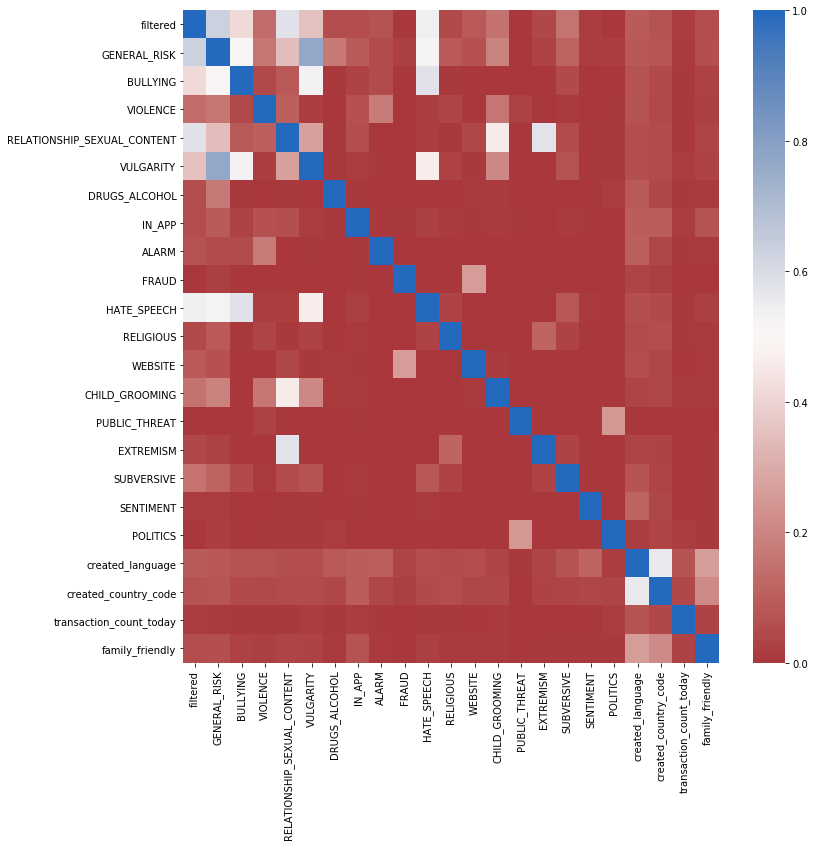

In [17]:
cramers_char1 = am.CramersV(cat_chat1_df)
plt.figure(figsize=(12,12))
ax = sns.heatmap(cramers_char1.fit(), cmap = 'vlag_r')
plt.show()

In [18]:
cont_chat1_df = chat1_df.drop(['filtered','GENERAL_RISK','BULLYING','VIOLENCE','RELATIONSHIP_SEXUAL_CONTENT','VULGARITY','DRUGS_ALCOHOL',
                      'IN_APP','ALARM','FRAUD','HATE_SPEECH','RELIGIOUS','WEBSITE','CHILD_GROOMING','PUBLIC_THREAT','EXTREMISM',
                      'SUBVERSIVE','SENTIMENT','POLITICS','created_language','created_country_code','transaction_count_today',
                      'family_friendly'],1)
cont_chat1_df.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,revenue,account_state,level,session_count_today,session_duration_today,revenue_today,raw_message,filtered_message,filtered_content,date,raw_message_preprocessed
0,0.0,3,33.0,2,5275.434000,0.0,come friendly battle,come friendly battle,[],2023-03-01,come friendly battle
1,0.0,3,31.0,3,1691.798000,0.0,Lord let's do 2v2,Lord let's do 2v2,[],2023-03-01,lord let u 2v2
2,0.0,3,31.0,3,1691.798000,0.0,and I am legend,and I am legend,[],2023-03-01,legend
4,0.0,3,50.0,7,3975.559000,0.0,I am playing this game for 5 years,I am playing this game for 5 years,[],2023-03-01,playing game 5 year
5,0.0,3,50.0,7,3975.559000,0.0,I have played my battles,I have played my battles,[],2023-03-01,played battle
7,0.0,3,50.0,7,3975.559000,0.0,tu abhi bacha h,tu abhi bacha h,[],2023-03-01,tu abhi bacha h
8,0.0,3,32.0,14,4192.960001,0.0,sorry,sorry,[],2023-03-01,sorry
9,0.0,3,32.0,14,4192.960001,0.0,now let's play,now let's play,[],2023-03-01,let u play
10,0.0,3,32.0,14,4192.960001,0.0,but still,but still,[],2023-03-01,still
11,0.0,3,32.0,14,4192.960001,0.0,ok,ok,[],2023-03-01,ok


In [19]:
cont_chat1_df.drop(['raw_message','filtered_message','filtered_content'],1,inplace=True)
cont_chat1_df['filtered'] = chat1_df['filtered']
cont_chat1_df.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,revenue,account_state,level,session_count_today,session_duration_today,revenue_today,date,raw_message_preprocessed,filtered
0,0.0,3,33.0,2,5275.434000,0.0,2023-03-01,come friendly battle,0
1,0.0,3,31.0,3,1691.798000,0.0,2023-03-01,lord let u 2v2,0
2,0.0,3,31.0,3,1691.798000,0.0,2023-03-01,legend,0
4,0.0,3,50.0,7,3975.559000,0.0,2023-03-01,playing game 5 year,0
5,0.0,3,50.0,7,3975.559000,0.0,2023-03-01,played battle,0
7,0.0,3,50.0,7,3975.559000,0.0,2023-03-01,tu abhi bacha h,0
8,0.0,3,32.0,14,4192.960001,0.0,2023-03-01,sorry,0
9,0.0,3,32.0,14,4192.960001,0.0,2023-03-01,let u play,0
10,0.0,3,32.0,14,4192.960001,0.0,2023-03-01,still,0
11,0.0,3,32.0,14,4192.960001,0.0,2023-03-01,ok,0


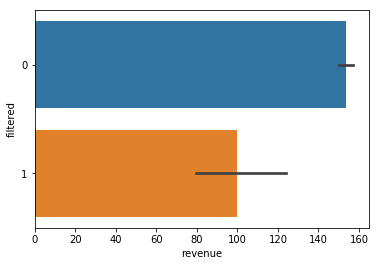

In [20]:
sns.barplot(x = cont_chat1_df['revenue'], y = cont_chat1_df['filtered'])

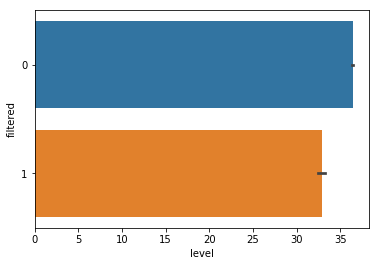

In [21]:
sns.barplot(x = cont_chat1_df['level'], y = cont_chat1_df['filtered'])

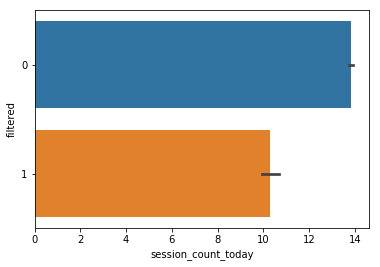

In [22]:
sns.barplot(x = cont_chat1_df['session_count_today'], y = cont_chat1_df['filtered'])

Textual data analysis

In [23]:
def preprocess_text(text):
    text = str(text)
    text = re.sub('[^a-zA-Z]'," ",str(text))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
#     tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
#     text = ' '.join(tokens)
    return tokens

In [24]:
chat1_df['raw_message'] = chat1_df['raw_message'].apply(preprocess_text)

In [25]:
chat1_df.head(10)

,revenue,account_state,level,created_language,created_country_code,session_count_today,session_duration_today,transaction_count_today,revenue_today,raw_message,...,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,family_friendly,date,raw_message_preprocessed
0,0.0,3,33.0,en-GB,IN,2,5275.434000,0,0.0,"[come, friendly, battle]",...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,come friendly battle
1,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,"[lord, let, v]",...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,lord let u 2v2
2,0.0,3,31.0,en-GB,IN,3,1691.798000,0,0.0,[legend],...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,legend
4,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,"[playing, game, year]",...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,playing game 5 year
5,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,"[played, battle]",...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,played battle
7,0.0,3,50.0,en-IN,IN,7,3975.559000,0,0.0,"[tu, abhi, bacha, h]",...,-1,-1,-1,-1,-1,-1,-1,-1,2023-03-01,tu abhi bacha h
8,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,[sorry],...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,sorry
9,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,"[let, play]",...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,let u play
10,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,[still],...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,still
11,0.0,3,32.0,en-GB,IN,14,4192.960001,0,0.0,[ok],...,-1,-1,-1,-1,-1,-1,-1,0,2023-03-01,ok


In [26]:
vocab = []
for i in range(len(chat1_df)):
    vocab.append(chat1_df['raw_message'].iloc[i])

In [27]:
vocab1 = []
for i in vocab:
    vocab1.extend(i)
    
vocab1

['come',
 'friendly',
 'battle',
 'lord',
 'let',
 'v',
 'legend',
 'playing',
 'game',
 'year',
 'played',
 'battle',
 'tu',
 'abhi',
 'bacha',
 'h',
 'sorry',
 'let',
 'play',
 'still',
 'ok',
 'bad',
 'net',
 'hey',
 'offer',
 'damnn',
 'wtf',
 'bad',
 'internet',
 'ya',
 'dang',
 'one',
 'ladder',
 'u',
 'get',
 'end',
 'season',
 'u',
 'played',
 'earthquake',
 'well',
 'close',
 'maxing',
 'deack',
 'yeah',
 'join',
 'lol',
 'lol',
 'lol',
 'close',
 'gg',
 'speak',
 'lol',
 'nah',
 'thanks',
 'language',
 'speak',
 'mateo',
 'close',
 'match',
 'barely',
 'paying',
 'attention',
 'game',
 'lmao',
 'probably',
 'one',
 'using',
 'nasty',
 'ok',
 'thanks',
 'use',
 'hi',
 'duud',
 'mean',
 'would',
 'like',
 'happened',
 'got',
 'deck',
 'dirty',
 'stay',
 'eeeeh',
 'beat',
 'nuke',
 'every',
 'time',
 'shame',
 'told',
 'free',
 'win',
 'gg',
 'leader',
 'clapped',
 'bro',
 'youre',
 'trash',
 'beat',
 'unless',
 'scared',
 'racist',
 'hi',
 'tiebreaker',
 'fair',
 'get',
 'good'

In [28]:
counts = Counter(vocab1)
counts = dict(counts)
counts

{'come': 499,
 'friendly': 185,
 'battle': 880,
 'lord': 41,
 'let': 1257,
 'v': 880,
 'legend': 147,
 'playing': 550,
 'game': 1833,
 'year': 328,
 'played': 517,
 'tu': 12,
 'abhi': 24,
 'bacha': 7,
 'h': 255,
 'sorry': 782,
 'play': 1738,
 'still': 687,
 'ok': 3280,
 'bad': 722,
 'net': 24,
 'hey': 635,
 'offer': 41,
 'damnn': 10,
 'wtf': 320,
 'internet': 61,
 'ya': 295,
 'dang': 114,
 'one': 1816,
 'ladder': 198,
 'u': 3736,
 'get': 2468,
 'end': 214,
 'season': 250,
 'earthquake': 27,
 'well': 790,
 'close': 295,
 'maxing': 18,
 'deack': 2,
 'yeah': 1236,
 'join': 624,
 'lol': 2422,
 'gg': 1871,
 'speak': 101,
 'nah': 400,
 'thanks': 1110,
 'language': 48,
 'mateo': 4,
 'match': 402,
 'barely': 49,
 'paying': 21,
 'attention': 27,
 'lmao': 608,
 'probably': 198,
 'using': 291,
 'nasty': 13,
 'use': 810,
 'hi': 1441,
 'duud': 1,
 'mean': 437,
 'would': 640,
 'like': 2094,
 'happened': 122,
 'got': 2305,
 'deck': 3114,
 'dirty': 22,
 'stay': 215,
 'eeeeh': 1,
 'beat': 327,
 'nuke':

In [29]:
counts.items()

dict_items([('come', 499), ('friendly', 185), ('battle', 880), ('lord', 41), ('let', 1257), ('v', 880), ('legend', 147), ('playing', 550), ('game', 1833), ('year', 328), ('played', 517), ('tu', 12), ('abhi', 24), ('bacha', 7), ('h', 255), ('sorry', 782), ('play', 1738), ('still', 687), ('ok', 3280), ('bad', 722), ('net', 24), ('hey', 635), ('offer', 41), ('damnn', 10), ('wtf', 320), ('internet', 61), ('ya', 295), ('dang', 114), ('one', 1816), ('ladder', 198), ('u', 3736), ('get', 2468), ('end', 214), ('season', 250), ('earthquake', 27), ('well', 790), ('close', 295), ('maxing', 18), ('deack', 2), ('yeah', 1236), ('join', 624), ('lol', 2422), ('gg', 1871), ('speak', 101), ('nah', 400), ('thanks', 1110), ('language', 48), ('mateo', 4), ('match', 402), ('barely', 49), ('paying', 21), ('attention', 27), ('lmao', 608), ('probably', 198), ('using', 291), ('nasty', 13), ('use', 810), ('hi', 1441), ('duud', 1), ('mean', 437), ('would', 640), ('like', 2094), ('happened', 122), ('got', 2305), ('

In [30]:
chat1_words = pd.DataFrame(counts.items(), columns = ['words','counts'])
chat1_words.head(10)

,words,counts
0,come,499
1,friendly,185
2,battle,880
3,lord,41
4,let,1257
5,v,880
6,legend,147
7,playing,550
8,game,1833
9,year,328


In [31]:
chat1_words = chat1_words.sort_values('counts',ascending = False)

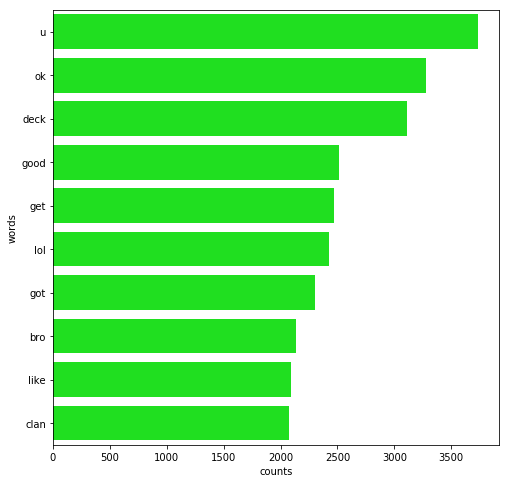

In [32]:
plt.figure(figsize = (8,8))
sns.barplot(x = chat1_words['counts'][:10], y = chat1_words['words'][:10], color = 'lime')

In [33]:
chat2_df['raw_message'] = chat2_df['raw_message'].apply(preprocess_text)
vocab = []
for i in range(len(chat2_df)):
    vocab.append(chat2_df['raw_message'].iloc[i])
    
vocab1 = []
for i in vocab:
    vocab1.extend(i)
    
counts = Counter(vocab1)
counts = dict(counts)
chat2_words = pd.DataFrame(counts.items(), columns = ['words','counts'])
chat2_words.head(10)

,words,counts
0,play,2878
1,v,1329
2,battle,1385
3,anyone,1457
4,come,825
5,want,2019
6,yea,663
7,ear,14
8,le,181
9,online,209


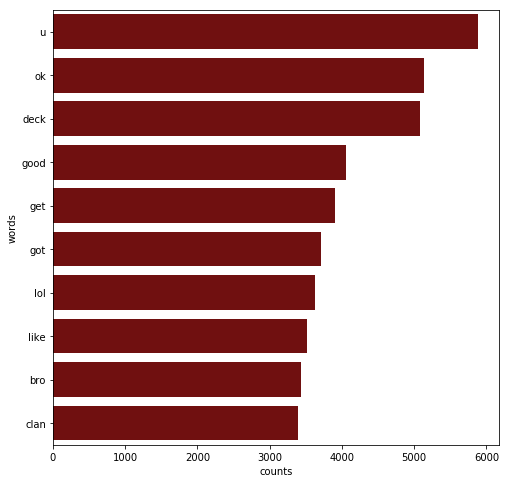

In [34]:
chat2_words = chat2_words.sort_values('counts',ascending = False)
plt.figure(figsize = (8,8))
sns.barplot(x = chat2_words['counts'][:10], y = chat2_words['words'][:10], color = 'maroon')

In [39]:
foul_words = []
for i in range(len(chat1_df['filtered_content'].value_counts().index)):
    foul_words.append(chat1_df['filtered_content'].value_counts().index[i])
    
foul_words

['[]',
 "['nigga']",
 "['nigger']",
 "['pussy']",
 "['Nigger']",
 "['sex']",
 "['Nigga']",
 "['gay']",
 "['wtf']",
 "['shit']",
 "['dick']",
 "['damn']",
 "['fuck']",
 "['fucking']",
 "['Nig']",
 "['r']",
 "['ass']",
 "['nig']",
 "['ig']",
 "['a']",
 "['d']",
 "['s']",
 "['Damn']",
 "['niggas']",
 "['Pussy']",
 "['Wtf']",
 "['cum']",
 "['ok']",
 "['Gg']",
 "['fag']",
 "['love' 'you']",
 "['gay' 'ass']",
 "['kys']",
 "['niggers']",
 "['cock']",
 "['WTF']",
 "['A']",
 "['ahhh']",
 "['bitch']",
 "['hell']",
 "['Niggers']",
 "['Faggot']",
 "['Gay']",
 "['I' 'love' 'you']",
 "['rape']",
 "['Dick']",
 "['Cock']",
 "['gya']",
 "['ahh']",
 "['stfu']",
 "['u']",
 "['boyfriend']",
 "['S']",
 "['Sex']",
 "['raped']",
 "['You']",
 "['wth']",
 "['af']",
 "['niga']",
 "['Me']",
 "['Bitch']",
 "['homo']",
 "['ho' 'gya']",
 "['Shit']",
 "['faggot']",
 "['Fag']",
 "['nibba']",
 "['U']",
 "['D']",
 "['NIGGER']",
 "['fags']",
 "['Fuck' 'you']",
 "['jap']",
 "['I']",
 "['fuckYou']",
 "['Fuck']",
 "['Suck'

In [44]:
foul_words1 = chat1_df['filtered_content'].value_counts().index
foul_count1 = chat1_df['filtered_content'].value_counts().values
# foul_words2 = chat2_df['filtered_content'].value_counts().index
# foul_count2 = chat2_df['filtered_content'].value_counts().values

foul_df1 = pd.DataFrame({"foul_chat1":foul_words1, "count_chat1":foul_count1})
foul_df1.head(10)

,foul_chat1,count_chat1
0,[],101451
1,['nigga'],62
2,['nigger'],45
3,['pussy'],45
4,['Nigger'],39
5,['sex'],31
6,['Nigga'],31
7,['gay'],26
8,['wtf'],25
9,['shit'],22


In [45]:
# foul_words1 = chat1_df['filtered_content'].value_counts().index
# foul_count1 = chat1_df['filtered_content'].value_counts().values
foul_words2 = chat2_df['filtered_content'].value_counts().index
foul_count2 = chat2_df['filtered_content'].value_counts().values

foul_df2 = pd.DataFrame({"foul_chat2":foul_words2, "count_chat2":foul_count2})
foul_df2.head(10)

,foul_chat2,count_chat2
0,[],161933
1,['nigga'],97
2,['gay'],65
3,['Nigger'],54
4,['nigger'],53
5,['pussy'],52
6,['wtf'],49
7,['Nigga'],44
8,['sex'],41
9,['dick'],35


In [46]:
foul_df1.shape, foul_df2.shape

((1888, 2), (2832, 2))

In [48]:
foul_df1 = foul_df1.sort_values('count_chat1',ascending=False)
foul_df2 = foul_df2.sort_values('count_chat2',ascending=False)
foul_df1 = foul_df1[1:]
foul_df2 = foul_df2[1:]

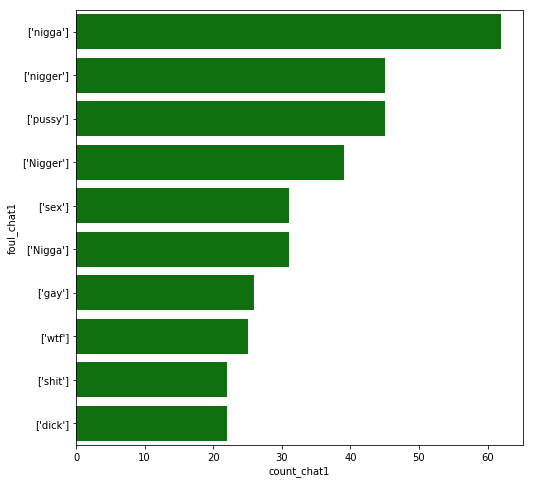

In [52]:
plt.figure(figsize=(8,8))
sns.barplot(x = foul_df1['count_chat1'][:10], y = foul_df1['foul_chat1'][:10], color = 'green')
plt.show()

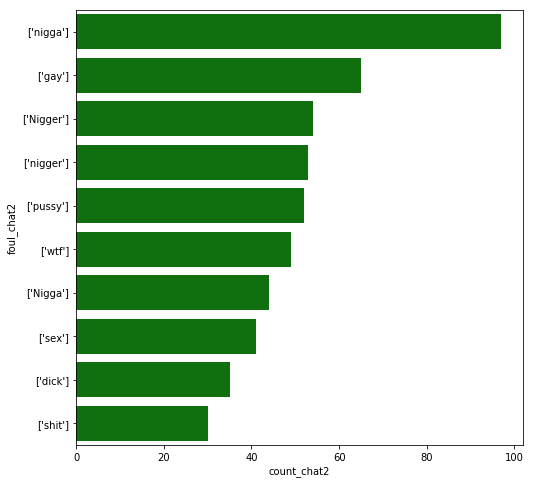

In [53]:
plt.figure(figsize=(8,8))
sns.barplot(x = foul_df2['count_chat2'][:10], y = foul_df2['foul_chat2'][:10], color = 'green')
plt.show()